In [2]:
#Q1
import pandas as pd
import time
start_time = time.time()
tweets_us_df = pd.read_csv('/Users/carol/Desktop/us_tweets_sample.csv')

In [3]:
number_of_obs = len(tweets_us_df.index) #find the number of observations.
print('The number of observations in original dataset is ',number_of_obs)

The number of observations in original dataset is  2000000


In [4]:
tweets_us_df.head()

,Unnamed: 0,index,user_id,status_id,created_at,screen_name,text,reply_to_screen_name,is_quote,is_retweet,...,listed_count,statuses_count,favourites_count,account_created_at,state,clean_text,cleaned_and_lemmatized_text,tweet_index,state_population,state_population_inv_weight
0,0,2020736,x727823344024858625,x1262450938884874240,2020-05-18 18:32:13,linda_sabatelli,Mariah is my constant quarantine companion. Sh...,NaN,False,False,...,0.0,321.0,616.0,2016-05-04 11:33:02,new york,mariah constant quarantine companion best make...,mariah constant quarantine companion best make...,TW2020736,19453561,16.872979
1,1,370903,x16882774,x1252702388932079616,2020-04-21 20:54:58,Yaniela,@realDonaldTrump @GOP Ask Donald about this! h...,Yaniela,True,False,...,7.0,35178.0,74268.0,2008-10-21 07:34:04,hawaii,realdonaldtrump gop ask donald xuwrxlc,realdonaldtrump gop ask donald xuwrxlc,TW370903,1415872,231.828529
2,2,5445533,x16287145,x1304225984594485248,2020-09-11 01:11:20,Paperboy415,Why are there so many #Fans in the stadium on ...,NaN,False,False,...,78.0,8961.0,3171.0,2008-09-14 20:48:49,connecticut,many fans stadium opening night nfl get teams ...,many fan stadium open night nfl get team set m...,TW5445533,3565287,92.065386
3,3,349490,x254120765,x1252658667649994756,2020-04-21 18:01:14,LakewoodDDS,Although we are in the midst of uncertain time...,NaN,False,False,...,12.0,3015.0,14.0,2011-02-18 16:57:45,ohio,although midst uncertain times time ignore ora...,although midst uncertain time time ignore oral...,TW349490,11689100,28.080821
4,4,937932,x4056561,x1255635298442067968,2020-04-29 23:09:18,franklinb,!!NEW Q - 4009!!\n16:01:10 EST \nhttps://t.co/...,NaN,False,True,...,101.0,44419.0,28116.0,2007-04-10 17:21:51,colorado,new est uukb bzgp knowledge power qanon hcq co...,new est uukb bzgp knowledge power qanon hcq co...,TW937932,5758736,56.998536


In [5]:
tweets_us_df_drop = tweets_us_df.drop_duplicates(subset= ['status_id'], keep='first', inplace=False)
tweets_us_df = tweets_us_df_drop.sample(n=500000, random_state=42)
tweets_us_df=tweets_us_df.reset_index(drop=True)

In [6]:
tweets_us_df['location'].head(60)

0                      Maryland, USA
1                     Washington, DC
2                   Washington, D.C.
3                    Kansas City, MO
4             Red Shirt South Dakota
5               Northern California 
6                     Washington, DC
7        Los Angeles, California USA
8                   Connecticut, USA
9                           Arizona 
10                            Nevada
11                       North Texas
12                         Wisconsin
13    Rhode Island - The 13th Colony
14                           Montana
15                      New York, NY
16                         Iowa, USA
17              United States, Ohio 
18                     Michigan, USA
19                      Arizona, USA
20                            Oregon
21                             Maine
22            Chicago, Illinois, USA
23                    Minnesota, USA
24                          New York
25                      Florida, USA
26                    Washington, DC
2

In [7]:
states_df = pd.read_excel('/Users/carol/Desktop/us_states.xlsx')
states_df['state'] = states_df['state'].str.lower()
tweets_us_df['location'] = tweets_us_df['location'].str.lower()

In [8]:
tweets_us_df['location']

0                  maryland, usa
1                 washington, dc
2               washington, d.c.
3                kansas city, mo
4         red shirt south dakota
                   ...          
499995     university of florida
499996        massachusetts, usa
499997               eagle idaho
499998                 ohio, usa
499999             kentucky, usa
Name: location, Length: 500000, dtype: object

In [9]:
states_df['state']

0            alabama
1             alaska
2            arizona
3           arkansas
4         california
5           colorado
6        connecticut
7           delaware
8            florida
9            georgia
10            hawaii
11             idaho
12          illinois
13           indiana
14              iowa
15            kansas
16          kentucky
17         louisiana
18             maine
19          maryland
20     massachusetts
21          michigan
22         minnesota
23       mississippi
24          missouri
25           montana
26          nebraska
27            nevada
28     new hampshire
29        new jersey
30        new mexico
31          new york
32    north carolina
33      north dakota
34              ohio
35          oklahoma
36            oregon
37      pennsylvania
38      rhode island
39    south carolina
40      south dakota
41         tennessee
42             texas
43              utah
44           vermont
45          virginia
46        washington
47     west v

In [11]:
import re
sloc=[]
a=0
for i in tweets_us_df['location']:
    i_space_s=' '+i+' '
    i_space=re.sub(r'[^\w\s]', " ", i_space_s)
    for m in states_df['state']:
        m_space=' '+m+' '
        if (m_space in i_space):
            a=a+1
        if (m_space==' virginia '):
            if(' west virginia ' in i_space) and (' virginia ' not in i_space.replace("west virginia"," ")):
                a=a-1
    sloc.append(a)
    a=0

In [12]:
more_state=[i for i, e in enumerate(sloc) if e > 1] #
len(more_state)

284

In [13]:
# for i in more_state:
tweets_us_df = tweets_us_df.drop(labels=more_state, axis=0)

In [14]:
tweets_us_df=tweets_us_df.reset_index(drop=True)

In [15]:
len(tweets_us_df)

499716

In [16]:
elapsed_time = time.time() - start_time
elapsed_time

149.7632279396057

In [17]:
#the number of observations I have in this updated dataset is 500000-284=499716; percentage of the data lost in the cleaning process is 284/500000=0.000568.

In [18]:
#Q2
start_time = time.time()

tweets_us_df['day']=pd.to_datetime(tweets_us_df['created_at'], infer_datetime_format=True).dt.date
tweets_us_df

,Unnamed: 0,index,user_id,status_id,created_at,screen_name,text,reply_to_screen_name,is_quote,is_retweet,...,statuses_count,favourites_count,account_created_at,state,clean_text,cleaned_and_lemmatized_text,tweet_index,state_population,state_population_inv_weight,day
0,1828401,680960,x1167830992465420290,x1253850611365355520,2020-04-25 00:57:35,60blue_bird,@DMKANDOIT @toolewlew @DefenseBaron @djrothkop...,DMKANDOIT,False,False,...,208.0,173.0,2019-08-31 16:06:40,maryland,dmkandoit toolewlew defensebaron djrothkopf re...,dmkandoit toolewlew defensebaron djrothkopf re...,TW680960,6045680,54.293235,2020-04-25
1,1200071,877896,x25320639,x1255458531458920450,2020-04-29 11:26:53,jerome_corsi,Dr. Corsi 04-28-20: DOJ after me again (still)...,NaN,False,False,...,52915.0,15311.0,2009-03-19 15:41:07,washington,corsi doj firebarr firewray allow mueller pros...,corsi doj firebarr firewray allow mueller pros...,TW877896,7614893,43.104942,2020-04-29
2,194849,2648951,x17448943,x1266502478696251392,2020-05-29 22:51:36,RitaRubin,What happens when a patient w/ #COVID19 underg...,NaN,False,True,...,12570.0,6238.0,2008-11-17 20:09:07,washington,happens patient covid undergoes surgery new re...,happens patient covid undergoes surgery new re...,TW2648951,7614893,43.104942,2020-05-29
3,1629054,5655268,x289424875,x1308455529895862274,2020-09-22 17:18:02,jeffgates01,“No amount of money will make up for the marke...,NaN,False,True,...,5921.0,2530.0,2011-04-28 16:38:15,kansas,amount money make markets lost billion new rel...,amount money make market lose billion new reli...,TW5655268,2913314,112.668776,2020-09-22
4,191144,5594975,x3320366514,x1307373577327575042,2020-09-19 17:38:45,BullsErnest,We know the pandemic is out of control.\nWe kn...,NaN,False,True,...,33053.0,47315.0,2015-08-19 17:06:16,south dakota,know pandemic control know kids get sick die d...,know pandemic control know kid get sick die de...,TW5594975,884659,371.035080,2020-09-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499711,485652,7593588,x231411836,x1331951032239349761,2020-11-26 13:20:47,richardrathe,Buckle up for our fourth #COVID peak by Christ...,NaN,True,False,...,2970.0,281.0,2010-12-28 12:55:45,florida,buckle fourth covid peak christmas inability f...,buckle fourth covid peak christmas inability f...,TW7593588,21477737,15.282780,2020-11-26
499712,1590998,4762656,x77266686,x1289824000210698240,2020-08-02 07:23:00,getinformed23,This is a total outrage. Jared Kushner commiss...,NaN,True,True,...,24675.0,24882.0,2009-09-25 17:38:14,massachusetts,total outrage jared kushner commissioned aband...,total outrage jar kushner commission abandon r...,TW4762656,6892503,47.622688,2020-08-02
499713,1579668,3908967,x1175778080440193026,x1281815896172961795,2020-07-11 05:01:39,Powers93601604,#FakeNews NBC Guest Doctor Who Was Suffering F...,NaN,False,True,...,12126.0,14172.0,2019-09-22 14:25:30,idaho,fakenews nbc guest doctor suffering coronaviru...,fakenews nbc guest doctor suffer coronavirus h...,TW3908967,1787065,183.675201,2020-07-11
499714,72585,1697813,x954816676490596352,x1259933443850452992,2020-05-11 19:48:36,DellySZN,“Let’s force them to open the gyms by showing ...,NaN,True,True,...,334.0,1208.0,2018-01-20 20:43:30,ohio,let force open gyms showing workout without one,let force open gym show workout without one,TW1697813,11689100,28.080821,2020-05-11


In [19]:
state_to_region={states_df.iloc[i,0]:states_df.iloc[i,1] for i in range(len(states_df))} #dict
state_to_region
tweets_us_df['region']=tweets_us_df['state'].map(state_to_region)  
tweets_us_df['region']

0         Northeast
1              West
2              West
3           Midwest
4           Midwest
            ...    
499711        South
499712    Northeast
499713         West
499714      Midwest
499715        South
Name: region, Length: 499716, dtype: object

In [20]:
elapsed_time = time.time() - start_time
elapsed_time

1.5876948833465576

In [21]:
#Q3
start_time = time.time()

import re
import nltk
import string
from nltk.corpus import stopwords
pattern=re.compile("\\s" + "\\s|\\s".join(stopwords.words('english')) + "\\s")

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def tweet_cleaner(text_string):
    text_string=text_string.lower()
    if text_string[:2]=="'b":
        text_string=text_string[2:]
    text_string=re.sub("#\\S+", '', text_string)
    text_string=text_string.translate(str.maketrans('','', string.punctuation))
    text_string=re.sub(pattern, ' ', text_string)   
    text_string=re.sub(r"\s\S{1,3}\s", ' ', text_string)
    text_string=re.sub(r"http\S+", '', text_string)
    text_string=re.sub(r"\s+", ' ', text_string)
    text_string=deEmojify(text_string)
    return text_string

In [23]:
elapsed_time = time.time() - start_time
elapsed_time

1.477220058441162

In [24]:
#Stop words are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

In [25]:
import nltk
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/carol/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/carol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
#Q4
start_time = time.time()

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)

##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))

In [28]:
tweets_us_df['text_clean']=tweets_us_df['text'].map(lambda x: lemmatize_tweet(x))

In [29]:
tweets_us_df['text_clean']

0         dmkandoit toolewlew defensebaron djrothkopf re...
1         dr corsi 042820 me still allow mueller prosecu...
2         what happen patient undergoes surgery report o...
3         no amount money make market lose billion relie...
4         we know pandemic control know kid sick death n...
                                ...                        
499711    buckle fourth peak christmas inability focus b...
499712    this total outrage jar kushner commission then...
499713             guest doctor suffer hospital never virus
499714          let force open gym show workout without one
499715    gspowers cyferptvila vist foreign online newsp...
Name: text_clean, Length: 499716, dtype: object

In [30]:
elapsed_time = time.time() - start_time
elapsed_time

505.8753080368042

In [31]:
# The lemmatizer function refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

In [32]:
#Q5
start_time = time.time()

isolation_df = pd.read_excel('/Users/carol/Desktop/isolation_words.xlsx')
isolation_df['words'].str.lower()

0         friendlessness
1              isolation
2             loneliness
3               loneness
4           lonesomeness
             ...        
357           withdrawal
358           distancing
359    social distancing
360      social distance
361             distance
Name: words, Length: 362, dtype: object

In [33]:
disinfectant_df = pd.read_excel('/Users/carol/Desktop/disinfectant_words.xlsx')
disinfectant_df['words'].str.lower()

0            antibacterial
1               antibiotic
2                  aseptic
3             bactericidal
4                    clean
               ...        
2132                  wipe
2133          ready-to-use
2134                 lysol
2135                clorox
2136    seventh generation
Name: words, Length: 2137, dtype: object

In [34]:
vaccine_df = pd.read_excel('/Users/carol/Desktop/vaccine_words.xlsx')
vaccine_df['words'].str.lower()

0             antibiotic
1               antibody
2             antipoison
3             antiseptic
4              antiserum
             ...        
182             medicago
183    sars-cov-2 sclamp
184                   uq
185        syneos health
186              seqirus
Name: words, Length: 187, dtype: object

In [35]:
medicine_df = pd.read_excel('/Users/carol/Desktop/medicine_words.xlsx')
medicine_df['words'].str.lower()

0               analysis
1                biology
2               cytology
3              diagnosis
4             dissection
             ...        
668              arbidol
669          galidesivir
670            antiviral
671    anti-inflammatory
672         immune-based
Name: words, Length: 673, dtype: object

In [36]:
isolation_df['words']=isolation_df['words'].map(lambda x : lemmatize_tweet(x))
isolation_df['words']

0         friendlessness
1              isolation
2             loneliness
3               loneness
4           lonesomeness
             ...        
357           withdrawal
358             distance
359    social distancing
360      social distance
361             distance
Name: words, Length: 362, dtype: object

In [37]:
disinfectant_df['words']=disinfectant_df['words'].map(lambda x : lemmatize_tweet(x))
disinfectant_df['words']

0            antibacterial
1               antibiotic
2                  aseptic
3             bactericidal
4                    clean
               ...        
2132                  wipe
2133            readytouse
2134                 lysol
2135                clorox
2136    seventh generation
Name: words, Length: 2137, dtype: object

In [38]:
vaccine_df['words']=vaccine_df['words'].map(lambda x : lemmatize_tweet(x))
vaccine_df['words']

0           antibiotic
1             antibody
2           antipoison
3           antiseptic
4            antiserum
            ...       
182           medicago
183    sarscov2 sclamp
184                 uq
185      syneos health
186            seqirus
Name: words, Length: 187, dtype: object

In [39]:
medicine_df['words']=medicine_df['words'].map(lambda x : lemmatize_tweet(x))
medicine_df['words']

0              analysis
1               biology
2              cytology
3             diagnosis
4            dissection
             ...       
668             arbidol
669         galidesivir
670           antiviral
671    antiinflammatory
672         immunebased
Name: words, Length: 673, dtype: object

In [40]:
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)
    

In [41]:
isolation_score=[]
for i in tweets_us_df['text_clean']:
    score = get_cosine(text_to_vector(i), text_to_vector(" ".join(isolation_df['words'])))
    isolation_score.append(score)

In [42]:
disinfectant_score=[]
for i in tweets_us_df['text_clean']:
    score = get_cosine(text_to_vector(i), text_to_vector(" ".join(disinfectant_df['words'])))
    disinfectant_score.append(score)

In [43]:
vaccine_score=[]
for i in tweets_us_df['text_clean']:
    score = get_cosine(text_to_vector(i), text_to_vector(" ".join(vaccine_df['words'])))
    vaccine_score.append(score)

In [44]:
medicine_score=[]
for i in tweets_us_df['text_clean']:
    score = get_cosine(text_to_vector(i), text_to_vector(" ".join(medicine_df['words'])))
    medicine_score.append(score)

In [45]:
from sklearn.preprocessing import minmax_scale
import numpy as np
skdf=minmax_scale(isolation_score)
isolation_score_normal=skdf.tolist()

In [46]:
skdf=minmax_scale(disinfectant_score)
disinfectant_score_normal=skdf.tolist()
disinfectant_score_normal

[0.0,
 0.0009898768195728414,
 0.0009898768195728414,
 0.0,
 0.0026688574787460343,
 0.0,
 0.007896485308778782,
 0.0,
 0.0,
 0.003959507278291366,
 0.0,
 0.0,
 0.0016294459171648588,
 0.0018917201041463278,
 0.006858067778939406,
 0.0,
 0.0,
 0.0010143219034527578,
 0.0,
 0.0,
 0.0,
 0.004057287613811031,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001934235976789168,
 0.0,
 0.0,
 0.004103134126807819,
 0.0,
 0.0009898768195728414,
 0.001434467792474983,
 0.002268092727187345,
 0.005237935786354585,
 0.0020286438069055156,
 0.0,
 0.002268092727187345,
 0.0,
 0.0,
 0.0,
 0.007548668884967012,
 0.0,
 0.0013677113756026065,
 0.007566880416585311,
 0.0013998972233186572,
 0.0,
 0.001814474181749876,
 0.0,
 0.0033127614645171184,
 0.008830397411056273,
 0.0010406723149883371,
 0.0,
 0.0011001865744574876,
 0.0,
 0.006858067778939406,
 0.0,
 0.0,
 0.0027778349354632636,
 0.0,
 0.0,
 0.0,
 0.0,
 0.000967117988394584,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001979753639145683,
 0.0029013539651837525,
 0.

In [47]:
skdf=minmax_scale(vaccine_score)
vaccine_score_normal=skdf.tolist()
vaccine_score_normal

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07142857142857142,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.038180177416060626,
 0.0,
 0.0,
 0.030457245193658635,
 0.0,
 0.02978777343672497,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.031943828249996996,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.031173984319427486,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15586992159713742,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2801659073402629,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05050762722761054,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.18569533817705186,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03464794643376185,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [48]:
skdf=minmax_scale(medicine_score)
medicine_score_normal=skdf.tolist()
medicine_score_normal

[0.016748647813902073,
 0.00913713647563844,
 0.06395995532946909,
 0.02564102564102564,
 0.0,
 0.009869235370762834,
 0.014577826759357976,
 0.0,
 0.0,
 0.01827427295127688,
 0.0,
 0.0,
 0.022561094618669737,
 0.0,
 0.0,
 0.0,
 0.01395720651158506,
 0.018725557521544138,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04365418106455121,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.009362778760772069,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02293403053845938,
 0.0,
 0.0,
 0.029607706112288506,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01785411855955875,
 0.0,
 0.0,
 0.0,
 0.02648193740996524,
 0.018725557521544138,
 0.0,
 0.00913713647563844,
 0.01785411855955875,
 0.0,
 0.05617667256463243,
 0.0,
 0.0656936015610614,
 0.0,
 0.0,
 0.0,
 0.007775364549527215,
 0.008058196936598832,
 0.03140371465106639,
 0.0111906610377432,
 0.0,
 0.0,
 0.007401926528072124,
 0.007775364549527215,
 0.015825984611496605,
 0.0,
 

In [49]:
tweets_us_df['disinfectant_cosine']=disinfectant_score
tweets_us_df['isolation_cosine']=isolation_score
tweets_us_df['medicine_cosine']=medicine_score
tweets_us_df['vaccine_cosine']=vaccine_score

In [50]:
tweets_us_df['disinfectant_cosine_normal']=disinfectant_score_normal
tweets_us_df['isolation_cosine_normal']=isolation_score_normal
tweets_us_df['medicine_cosine_normal']=medicine_score_normal
tweets_us_df['vaccine_cosine_normal']=vaccine_score_normal

In [51]:
elapsed_time = time.time() - start_time
elapsed_time

1469.9998807907104

In [53]:
#Q6

In [54]:
start_time = time.time()

In [55]:
state_cosine_df=tweets_us_df.groupby(['state']).mean()
state_cosine_df=state_cosine_df.reset_index()
state_topic_score_data=state_cosine_df[['state','disinfectant_cosine_normal','isolation_cosine_normal','medicine_cosine_normal','vaccine_cosine_normal']]

In [56]:
state_topic_score_data

,state,disinfectant_cosine_normal,isolation_cosine_normal,medicine_cosine_normal,vaccine_cosine_normal
0,alabama,0.002194,0.005417,0.014093,0.014238
1,alaska,0.002073,0.004883,0.013072,0.013477
2,arizona,0.002190,0.004967,0.013306,0.013177
3,arkansas,0.002100,0.006103,0.013392,0.012304
4,california,0.002336,0.004720,0.013124,0.012918
5,colorado,0.002200,0.004900,0.014075,0.014349
6,connecticut,0.002125,0.005051,0.014756,0.016227
7,delaware,0.002309,0.004461,0.012756,0.013295
8,florida,0.002118,0.004837,0.013087,0.012396
9,georgia,0.002312,0.004588,0.014064,0.013792


In [57]:
region_cosine_df=tweets_us_df.groupby(['region']).mean()
region_cosine_df=region_cosine_df.reset_index()
region_topic_score_data=region_cosine_df[['region','disinfectant_cosine_normal','isolation_cosine_normal','medicine_cosine_normal','vaccine_cosine_normal']]

In [58]:
region_topic_score_data

,region,disinfectant_cosine_normal,isolation_cosine_normal,medicine_cosine_normal,vaccine_cosine_normal
0,Midwest,0.002229,0.005085,0.013848,0.013373
1,Northeast,0.002222,0.005043,0.013656,0.013929
2,South,0.002196,0.005025,0.013732,0.013542
3,West,0.002183,0.004989,0.013732,0.014189


In [60]:
elapsed_time = time.time() - start_time
elapsed_time

29.65344500541687

In [61]:
# I observe that the texts during covid-19 period generally include more medicine words and vaccine words, no matter in which region or state. 

In [62]:
#Q7

In [77]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']])
state_topic_score_data['kmeans.labels_']=kmeans.labels_
state_topic_score_data['region']=state_topic_score_data['state'].map(state_to_region)  
kmeans.labels_

/var/folders/0y/1xswhtb9233dmfpnjsyf9zb00000gn/T/ipykernel_940/3602971553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_topic_score_data['kmeans.labels_']=kmeans.labels_
/var/folders/0y/1xswhtb9233dmfpnjsyf9zb00000gn/T/ipykernel_940/3602971553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_topic_score_data['region']=state_topic_score_data['state'].map(state_to_region)


array([1, 2, 2, 0, 2, 1, 3, 2, 0, 1, 0, 3, 2, 1, 0, 2, 2, 2, 0, 3, 1, 1,
       2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 2, 2], dtype=int32)

In [78]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=0).fit(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']])
state_topic_score_data['clustering.labels_']=clustering.labels_
clustering.labels_

/var/folders/0y/1xswhtb9233dmfpnjsyf9zb00000gn/T/ipykernel_940/4207127667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_topic_score_data['clustering.labels_']=clustering.labels_


array([3, 0, 0, 1, 2, 3, 3, 0, 2, 2, 1, 3, 0, 2, 1, 0, 1, 0, 0, 3, 2, 3,
       1, 0, 3, 3, 1, 2, 2, 1, 3, 0, 0, 0, 2, 3, 3, 2, 2, 0, 3, 2, 3, 2,
       2, 3, 3, 0, 0])

In [65]:
state_topic_score_data

,state,disinfectant_cosine_normal,isolation_cosine_normal,medicine_cosine_normal,vaccine_cosine_normal,kmeans.labels_,region,clustering.labels_
0,alabama,0.002194,0.005417,0.014093,0.014238,1,South,3
1,alaska,0.002073,0.004883,0.013072,0.013477,2,West,0
2,arizona,0.002190,0.004967,0.013306,0.013177,2,West,0
3,arkansas,0.002100,0.006103,0.013392,0.012304,0,South,1
4,california,0.002336,0.004720,0.013124,0.012918,2,West,2
5,colorado,0.002200,0.004900,0.014075,0.014349,1,West,3
6,connecticut,0.002125,0.005051,0.014756,0.016227,3,Northeast,3
7,delaware,0.002309,0.004461,0.012756,0.013295,2,South,0
8,florida,0.002118,0.004837,0.013087,0.012396,0,South,2
9,georgia,0.002312,0.004588,0.014064,0.013792,1,South,2


In [66]:
#By observing the columns states, kmeans.labels_, region, and clustering.labels_, we found there's no obvious relation between the clustering and locations. 
#compared the k-means and spectral clustering, k-mean gives relatively better results since it has a small pattern among states by obervation, while spectral clustering seems totally ramdon without a kind of pattern. 

In [67]:
#Q8
import sklearn
ideal_kmeans=[]
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']])
    kmeans_score=sklearn.metrics.calinski_harabasz_score(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']], kmeans.labels_)
    ideal_kmeans.append(kmeans_score)
ideal_kmeans

[42.60453059920297,
 36.4168461751497,
 34.274322354067145,
 32.21569586191919,
 32.42323267641285,
 31.61701687656642,
 30.9896381220678,
 30.254808271988978,
 31.89527586792317,
 30.75229048406643,
 31.276601889442667,
 30.609340633654014,
 31.728297500057273,
 32.78500674187649,
 32.00292627442344,
 32.21126741902102,
 33.33463224412626,
 33.82653307969675,
 32.05220738299071]

In [68]:
import sklearn
ideal_clustering=[]
for i in range(2,21):
    clustering = SpectralClustering(n_clusters=i,assign_labels='discretize',random_state=0).fit(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']])
    clustering_score=sklearn.metrics.calinski_harabasz_score(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']], clustering.labels_)
    ideal_clustering.append(clustering_score)
ideal_clustering

[41.86125455975408,
 24.58896027558781,
 14.793770776736158,
 14.774022775978027,
 12.089086346464788,
 9.168731105167495,
 8.212379828064504,
 5.539946609454138,
 4.051911058619384,
 3.6075790861928723,
 3.771146156466814,
 3.8912442720790645,
 3.117457697236752,
 2.767238419614901,
 2.38283350190769,
 3.791165063603663,
 3.258186898671288,
 3.6284555689288616,
 2.233190268227704]

In [69]:
# K-means give better results, since it generally has higher Calinski-Harabasz scores. The result is the same as what I identified in Q7. And we find when cluster number n=2, Calinski-Harabasz score is the highest.

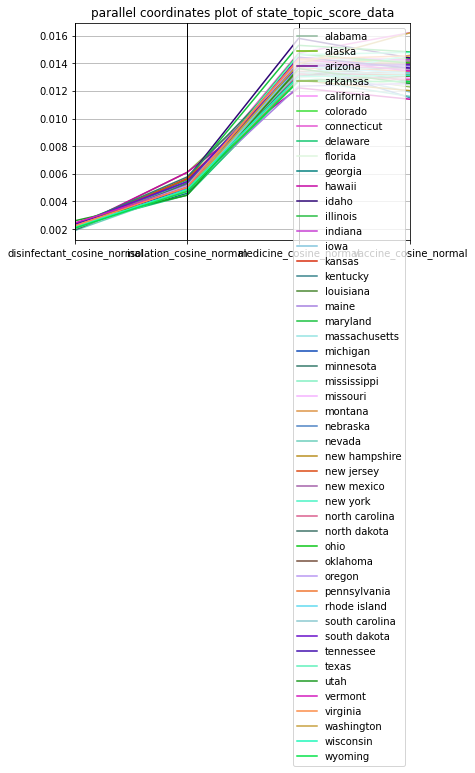

In [70]:
#Q9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline
plt.figure()
plt.title("parallel coordinates plot of state_topic_score_data")
parallel_coordinates(state_topic_score_data[['state','disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']],'state' )
plt.show()


In [71]:
#There are similar patterns but no identical patterns. The disinfectant cosine number generally around 0.002 to 0.003; isolation cosine normal is around 0.0045 to 0.006; medicine cosine normal is around 0.012 to 0.016; vaccine cosine normal is around 0.0115 to 0.016. Since they are not in the identical pattern, it means states still make some effects on the distribution of word types. 

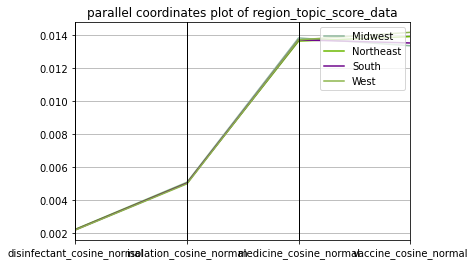

In [72]:
#Q10
plt.figure()
plt.title("parallel coordinates plot of region_topic_score_data")
parallel_coordinates(region_topic_score_data[['region','disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']],'region')
plt.show()

In [73]:
# There are nearly identical patterns. The disinfectant cosine number generally around 0.0022; isolation cosine normal is around 0.005; medicine cosine normal is around 0.014; vaccine cosine normal is around 0.0135 to 0.014.
# Since there is nearly identical patterns among different states, it means states do not affect the words type distribution. Thus, we get the k-means clustering 

In [82]:
#Q11
from sklearn.decomposition import PCA
data_pca=PCA(n_components=2).fit_transform(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']])

In [86]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']])
state_topic_score_data['kmeans.labels_']=kmeans.labels_

/var/folders/0y/1xswhtb9233dmfpnjsyf9zb00000gn/T/ipykernel_940/383143910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_topic_score_data['kmeans.labels_']=kmeans.labels_


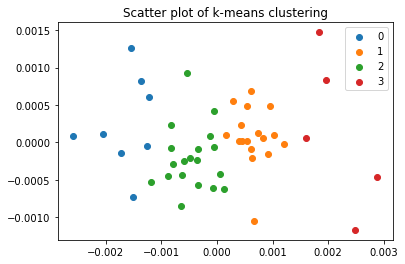

In [87]:
u_labels = np.unique(kmeans.labels_)
#plotting the results:
import matplotlib.pyplot as plt
for i in u_labels:
    plt.scatter(data_pca[kmeans.labels_== i , 0] , data_pca[kmeans.labels_ == i , 1] , label = i)
plt.title('Scatter plot of k-means clustering')
plt.legend()
plt.show()

In [88]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=0).fit(state_topic_score_data[['disinfectant_cosine_normal', 'isolation_cosine_normal', 'medicine_cosine_normal', 'vaccine_cosine_normal']])
state_topic_score_data['clustering.labels_']=clustering.labels_

/var/folders/0y/1xswhtb9233dmfpnjsyf9zb00000gn/T/ipykernel_940/993313737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_topic_score_data['clustering.labels_']=clustering.labels_


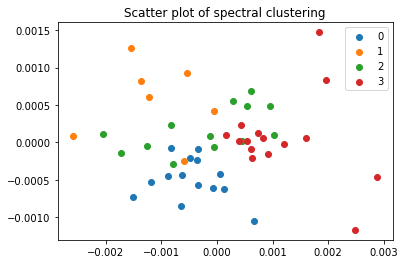

In [89]:
u_labels = np.unique(clustering.labels_)
#plotting the results:
import matplotlib.pyplot as plt
for i in u_labels:
    plt.scatter(data_pca[clustering.labels_== i , 0] , data_pca[clustering.labels_ == i , 1] , label = i)
plt.title('Scatter plot of spectral clustering')
plt.legend()
plt.show()

In [81]:
#There's a left to right pattern in the k-means clustering scatterplot; while there's no obvious pattern in spectral clustering scatterplot. This also checks the outcome I got in Q7, since it also shows that the k-means clustering create better result than the spectral clustering.